In [1]:
# libraries
import pandas as pd
import numpy as np
from pymongo import MongoClient
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Import data to MongoDB

In [6]:
#read data in csv format
git = pd.read_csv("/Users/crystal_wong/Documents/MSc Business Analytics/Term 3/SMM695 Data Management System/FCP/gitData.csv")
issues = pd.read_csv("/Users/crystal_wong/Documents/MSc Business Analytics/Term 3/SMM695 Data Management System/FCP/gitIssues.csv")

In [45]:
# check the shape of the data
print(git.shape)
print(issues.shape)

(60996, 30)
(32329, 22)


In [170]:
issues.loc[issues['project'] == 'pytorch', 'closed_at']

0       2021-01-11 04:38:15
1       2021-01-11 04:38:15
2       2021-01-11 04:38:15
3       2021-01-11 04:38:15
4       2021-01-11 04:38:15
               ...         
1505    2021-10-18 16:10:54
1506    2021-10-18 16:10:54
1507    2021-10-18 16:10:54
1508    2021-10-18 16:10:54
1509    2021-10-18 16:10:54
Name: closed_at, Length: 1510, dtype: object

In [167]:
issues.columns

Index(['Unnamed: 0', 'title', 'state', 'body', 'user', 'user_id', 'repository',
       'created_at', 'updated_at', 'closed_at', 'assignees', 'labels',
       'reactions', 'n_comments', 'closed_by', 'comment_id',
       'comment_created_at', 'comment_updated_at', 'comment_user_id',
       'comment_user', 'comment_text', 'project'],
      dtype='object')

In [8]:
#data inspection
print(git.info())
print(issues.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60996 entries, 0 to 60995
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          60996 non-null  int64  
 1   hash                60996 non-null  object 
 2   msg                 60996 non-null  object 
 3   author_name         60996 non-null  object 
 4   committer_name      60996 non-null  object 
 5   author_date         60996 non-null  object 
 6   author_timezone     60996 non-null  int64  
 7   committer_date      60996 non-null  object 
 8   committer_timezone  60996 non-null  int64  
 9   branches            60996 non-null  object 
 10  in_main_branch      60996 non-null  bool   
 11  merge               60996 non-null  bool   
 12  parents             60996 non-null  object 
 13  project_name        60996 non-null  object 
 14  deletions           60996 non-null  int64  
 15  insertions          60996 non-null  int64  
 16  line

In [46]:
# let's connect to the localhost
client = MongoClient()

# let's create a database 
db = client.github

# collection for git issues
gitIssues = db.gitIssues

# print connection
print("""
Database
==========
{}

Collection
==========
{}
""".format(db, gitIssues), flush=True
)


Database
Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'github')

Collection
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'github'), 'gitIssues')



In [47]:
%%time 
##
# slow loading of data
d_gitissue = {}
# pass data 
for i in issues.index:
    d_gitissue = {
        "Questions": {
            "Title": issues.loc[i,"title"],
            "Body": issues.loc[i,"body"]
        },
        "User" : {
            "Username" : issues.loc[i, "user"],
            "User_ID" :  issues.loc[i,"user_id"]
        },
        "State" : {
            "State" : issues.loc[i, "state"],
            "Created_at" :  issues.loc[i,"created_at"],
            "Updated_at" :  issues.loc[i,"updated_at"],
            "Closed_at" : issues.loc[i, "closed_at"]
        },
        "Assignees" : issues.loc[i, "assignees"],
        "Closed_by" : issues.loc[i, "closed_by"],
        "Labels" : issues.loc[i, "labels"],
        "Reactions" : issues.loc[i, "reactions"],
        "N_comments" : issues.loc[i, "n_comments"].astype(str),
        "Projects" : issues.loc[i, "project"]
    }
    if i == 0:
        gitIssues.insert_one(d_gitissue)
    else: 
        if issues.loc[i, 'title'] == issues.loc[i-1,'title']:
            continue
        else:
            gitIssues.insert_one(d_gitissue)

CPU times: user 6.1 s, sys: 423 ms, total: 6.53 s
Wall time: 10.5 s


In [12]:
# new collection for issue comment
IssueComment = db.IssueComment

# print connection
print("""
Database
==========
{}

Collection
==========
{}
""".format(db, IssueComment), flush=True
)


Database
Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'github')

Collection
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'github'), 'IssueComment')



In [13]:
%%time 
##
# slow loading of data
d_comment = {}
# pass data 
for i in issues.index:
    d_comment = {
        "Title": issues.loc[i,"title"],
        "Comment_id": issues.loc[i,"comment_id"].astype(str),
        "Comment_created_at": issues.loc[i,"comment_created_at"],
        "Comment_updated_at": issues.loc[i, "comment_updated_at"],
        "Comment_user_id": issues.loc[i, "comment_user_id"],
        "Comment_user": issues.loc[i, "comment_user"],
        "Comment_text": issues.loc[i, "comment_text"]
    }
    IssueComment.insert_one(d_comment)

CPU times: user 9.52 s, sys: 640 ms, total: 10.2 s
Wall time: 14.4 s


In [14]:
# let's connect to the localhost
client = MongoClient()

# let's create a database 
db = client.github

In [15]:
# new collection for git data
gitData = db.gitData_new

# print connection
print("""
Database
==========
{}

Collection
==========
{}
""".format(db, gitData), flush=True
)


Database
Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'github')

Collection
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'github'), 'gitData_new')



In [16]:
# import the git data to mongo compass
#%%time 
##
# slow loading of data
d_gitcommit = {}
#pass data
for i in git.index:
    d_gitcommit = {
        "Commit": {
            "hash":git.loc[i, "hash"],
            "Msg":{
                "msg":git.loc[i, 'msg'],
                "Author":{
                    "Author_name": git.loc[i, 'author_name'],
                    "Author_date": git.loc[i, 'author_date'],
                    "Author_timezone": git.loc[i, 'author_timezone'].astype(str)
                }
            },
            "Committer":{
                "Committer_name": git.loc[i, 'committer_name'],
                "Committer_date": git.loc[i, 'committer_date'],
                "Committer_timezone": git.loc[i, 'committer_timezone'].astype(str)
            }
        },
        "Branch":{
            "Branches": git.loc[i, 'branches'],
            "In_main_branch": git.loc[i, 'in_main_branch'].astype(str),
            "Merge": git.loc[i, 'merge'].astype(str),
            "Parents":git.loc[i, 'parents']
        },
        "Project_name": git.loc[i, 'project_name'],
        "File":{
            "Filename": git.loc[i, 'filename'],
            "Change_type": git.loc[i, 'change_type'],
            "Commit_change":{
                "Deletions": git.loc[i, 'deletions'].astype(str),
                "Insertions": git.loc[i, 'insertions'].astype(str),
                "Files": git.loc[i, 'files'].astype(str),
                "Lines":git.loc[i, 'lines'].astype(str)
            }
        },
        "Code_change":{
            "Path":{
                "old_path":git.loc[i, 'old_path'],
                "new_path": git.loc[i, 'new_path']
            },
            "Diff":{
                "Diff": git.loc[i, 'diff'],
                "Diff_parse":{
                    "Diff_parsed":git.loc[i, 'diff_parsed'],
                    "Deleted_lines":git.loc[i, 'deleted_lines'].astype(str)
                }
            },
            "Source_code":{
                "Source_code":git.loc[i, 'source_code'],
                "Source_code_before":git.loc[i, 'source_code_before']
            }
        },
        "Nloc":git.loc[i, 'nloc'],
        "Complexity":git.loc[i, 'complexity'],
        "Token_count":git.loc[i, 'token_count']
        
     }
    gitData.insert_one(d_gitcommit)

# Clean data

In [48]:
# let's connect to the localhost
client = MongoClient()
# link to the database
db = client.github

# link to the collection
gitData = db.gitData
gitIssues = db.gitIssues
IssueComment = db.IssueComment


In [49]:
# data cleaning
# clean the NA values into null
# get key names
key_list_issue = []
for i in d_gitissue.keys():
    try:
        for b in d_gitissue.get(str(i)).keys():
            key_list_issue.append(str(i) + '.' + str(b))
    except:
        key_list_issue.append(i)

In [19]:
# get key names
key_list_comment = []
for i in d_comment.keys():
    try:
        for b in d_comment.get(str(i)).keys():
            key_list_comment.append(str(i) + '.' + str(b))
    except:
        key_list_comment.append(i)

In [20]:
# get key names
key_list_commit = []
for i in d_gitcommit.keys():
    try:
        for b in d_gitcommit.get(str(i)).keys():
            key_list_commit.append(str(i) + '.' + str(b))
    except:
        key_list_commit.append(i)

In [50]:
# unset NaN fields
for i in key_list_issue:
    update = gitIssues.update_many({str(i):np.nan},{"$unset": {str(i):""}})
    print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format(i, update.matched_count, update.modified_count), flush=True)


    Key: Questions.Title
    Matched: 0
    Modified: 0
    ------------
    

    Key: Questions.Body
    Matched: 175
    Modified: 175
    ------------
    

    Key: User.Username
    Matched: 0
    Modified: 0
    ------------
    

    Key: User.User_ID
    Matched: 0
    Modified: 0
    ------------
    

    Key: State.State
    Matched: 0
    Modified: 0
    ------------
    

    Key: State.Created_at
    Matched: 0
    Modified: 0
    ------------
    

    Key: State.Updated_at
    Matched: 0
    Modified: 0
    ------------
    

    Key: State.Closed_at
    Matched: 0
    Modified: 0
    ------------
    

    Key: Assignees
    Matched: 0
    Modified: 0
    ------------
    

    Key: Closed_by
    Matched: 3311
    Modified: 3311
    ------------
    

    Key: Labels
    Matched: 0
    Modified: 0
    ------------
    

    Key: Reactions
    Matched: 0
    Modified: 0
    ------------
    

    Key: N_comments
    Matched: 0
    Modified: 0
    ------------
    

  

In [22]:
# unset NaN fields
for i in key_list_comment:
    update = IssueComment.update_many({str(i):np.nan},{"$unset": {str(i):""}})
    print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format(i, update.matched_count, update.modified_count), flush=True)


    Key: Title
    Matched: 0
    Modified: 0
    ------------
    

    Key: Comment_id
    Matched: 0
    Modified: 0
    ------------
    

    Key: Comment_created_at
    Matched: 0
    Modified: 0
    ------------
    

    Key: Comment_updated_at
    Matched: 0
    Modified: 0
    ------------
    

    Key: Comment_user_id
    Matched: 0
    Modified: 0
    ------------
    

    Key: Comment_user
    Matched: 0
    Modified: 0
    ------------
    

    Key: Comment_text
    Matched: 0
    Modified: 0
    ------------
    

    Key: _id
    Matched: 0
    Modified: 0
    ------------
    


In [23]:
# unset NaN fields
for i in key_list_commit:
    update = gitData.update_many({str(i):np.nan},{"$unset": {str(i):""}})
    print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format(i, update.matched_count, update.modified_count), flush=True)


    Key: Commit.hash
    Matched: 0
    Modified: 0
    ------------
    

    Key: Commit.Msg
    Matched: 0
    Modified: 0
    ------------
    

    Key: Commit.Committer
    Matched: 0
    Modified: 0
    ------------
    

    Key: Branch.Branches
    Matched: 0
    Modified: 0
    ------------
    

    Key: Branch.In_main_branch
    Matched: 0
    Modified: 0
    ------------
    

    Key: Branch.Merge
    Matched: 0
    Modified: 0
    ------------
    

    Key: Branch.Parents
    Matched: 0
    Modified: 0
    ------------
    

    Key: Project_name
    Matched: 0
    Modified: 0
    ------------
    

    Key: File.Filename
    Matched: 0
    Modified: 0
    ------------
    

    Key: File.Change_type
    Matched: 0
    Modified: 0
    ------------
    

    Key: File.Commit_change
    Matched: 0
    Modified: 0
    ------------
    

    Key: Code_change.Path
    Matched: 0
    Modified: 0
    ------------
    

    Key: Code_change.Diff
    Matched: 0
    Modified: 0


In [51]:
# update the date date from string to datetime
# change the data type of 'Created_at', 'Updated_at', and 'closed_at' in gitissues
update = gitIssues.update_many(
    {},
    [{"$set": {
        "State.Created_at": {
            "$toDate":"$State.Created_at" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Created_at", update.matched_count, update.modified_count), flush=True)


    Key: Created_at
    Matched: 5513
    Modified: 5513
    ------------
    


In [52]:
# change the data type of 'Created_at', 'Updated_at', and 'closed_at' in gitissues
update = gitIssues.update_many(
    {},
    [{"$set": {
        "State.Updated_at": {
            "$toDate":"$State.Updated_at" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Updated_at", update.matched_count, update.modified_count), flush=True)


    Key: Updated_at
    Matched: 5513
    Modified: 5513
    ------------
    


In [53]:
# change the data type of 'Created_at', 'Updated_at', and 'closed_at' in gitissues
update = gitIssues.update_many(
    {},
    [{"$set": {
        "State.Closed_at": {
            "$toDate":"$State.Closed_at" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Closed_at", update.matched_count, update.modified_count), flush=True)


    Key: Closed_at
    Matched: 5513
    Modified: 5513
    ------------
    


In [27]:
# change the data type of 'Author_date', 'Committer_date' in gitData
update = gitData.update_many(
    {},
    [{"$set": {
        "Commit.Msg.Author.Author_date": {
            "$toDate":"$Commit.Msg.Author.Author_date" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Commit.Msg.Author.Author_date", update.matched_count, update.modified_count), flush=True)


    Key: Commit.Msg.Author.Author_date
    Matched: 60996
    Modified: 60996
    ------------
    


In [28]:
# change the data type of 'Author_date', 'Committer_date' in gitData
update = gitData.update_many(
    {},
    [{"$set": {
        "Commit.Committer.Committer_date": {
            "$toDate":"$Commit.Committer.Committer_date" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Commit.Committer.Committer_date", update.matched_count, update.modified_count), flush=True)


    Key: Commit.Committer.Committer_date
    Matched: 60996
    Modified: 60996
    ------------
    


In [29]:
# change the data type of 'Comment_created_at' in issueComment
update = IssueComment.update_many(
    {},
    [{"$set": {
        "Comment_created_at": {
            "$toDate":"$Comment_created_at" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Comment_created_at", update.matched_count, update.modified_count), flush=True)


    Key: Comment_created_at
    Matched: 64658
    Modified: 32329
    ------------
    


In [30]:
# change the data type of 'Comment_updated_at' in issueComment
update = IssueComment.update_many(
    {},
    [{"$set": {
        "Comment_updated_at": {
            "$toDate":"$Comment_updated_at" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Comment_updated_at", update.matched_count, update.modified_count), flush=True)


    Key: Comment_updated_at
    Matched: 64658
    Modified: 32329
    ------------
    


In [54]:
# update numeric data from string to int
# change the data type of "N_comments" in gitIssues into integer
update = gitIssues.update_many(
    {},
    [{"$set": {
        "N_comments": {
            "$toInt":"$N_comments" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("N_comments", update.matched_count, update.modified_count), flush=True)


    Key: N_comments
    Matched: 5513
    Modified: 5513
    ------------
    


In [32]:
# change the data type of "Author_timezone" in gitData into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "Commit.Msg.Author.Author_timezone": {
            "$toInt":"$Commit.Msg.Author.Author_timezone" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Author_timezone", update.matched_count, update.modified_count), flush=True)


    Key: Author_timezone
    Matched: 60996
    Modified: 60996
    ------------
    


In [33]:
# change the data type of "Author_timezone" in gitData into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "Commit.Committer.Committer_timezone": {
            "$toInt":"$Commit.Committer.Committer_timezone" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Commit.Committer.Committer_timezone", update.matched_count, update.modified_count), flush=True)


    Key: Commit.Committer.Committer_timezone
    Matched: 60996
    Modified: 60996
    ------------
    


In [34]:
# change the data type of "Deletions" in gitdata into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "File.Commit_change.Deletions": {
            "$toInt":"$File.Commit_change.Deletions" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Deletions", update.matched_count, update.modified_count), flush=True)


    Key: Deletions
    Matched: 60996
    Modified: 60996
    ------------
    


In [35]:
# change the data type of "Insertions" in gitdata into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "File.Commit_change.Insertions": {
            "$toInt":"$File.Commit_change.Insertions" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Insertions", update.matched_count, update.modified_count), flush=True)


    Key: Insertions
    Matched: 60996
    Modified: 60996
    ------------
    


In [36]:
# change the data type of "Files" in gitdata into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "File.Commit_change.Files": {
            "$toInt":"$File.Commit_change.Files" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Files", update.matched_count, update.modified_count), flush=True)


    Key: Files
    Matched: 60996
    Modified: 60996
    ------------
    


In [37]:
# change the data type of "Lines" in gitdata into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "File.Commit_change.Lines": {
            "$toInt":"$File.Commit_change.Lines" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Lines", update.matched_count, update.modified_count), flush=True)


    Key: Lines
    Matched: 60996
    Modified: 60996
    ------------
    


In [38]:
# change the data type of "Deleted Lines" in gitdata into integer
update = gitData.update_many(
    {},
    [{"$set": {
        "Code_change.Diff.Diff_parse.Deleted_lines": {
            "$toInt":"$Code_change.Diff.Diff_parse.Deleted_lines" } 
        }
    }
]
)

print("""
    Key: {}
    Matched: {}
    Modified: {}
    ------------
    """.format("Deleted Lines", update.matched_count, update.modified_count), flush=True)


    Key: Deleted Lines
    Matched: 60996
    Modified: 60996
    ------------
    


# PySpark

### connect to gitIssue

In [2]:
import findspark
findspark.init()
findspark.add_packages(r"org.mongodb.spark:mongo-spark-connector_2.12:3.0.1")

In [3]:
### connect to spark
from pyspark.sql import SparkSession
# Session with Mongo
spark_mongo = SparkSession \
    .builder \
    .appName("gitIssues") \
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1:27017/github.gitIssues") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1:27017/github.gitIssues") \
    .config('spark.jars.packages', 'org.mongodb.spark:mongo-spark-connector_2.12:3.0.1') \
    .getOrCreate()

Ivy Default Cache set to: /Users/crystal_wong/.ivy2/cache
The jars for the packages stored in: /Users/crystal_wong/.ivy2/jars
:: loading settings :: url = jar:file:/Users/crystal_wong/opt/anaconda3/envs/DMS/lib/python3.8/site-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml
org.mongodb.spark#mongo-spark-connector_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-b550d40d-2e21-4517-a11d-666bdce89764;1.0
	confs: [default]
	found org.mongodb.spark#mongo-spark-connector_2.12;3.0.1 in central
	found org.mongodb#mongodb-driver-sync;4.0.5 in central
	found org.mongodb#bson;4.0.5 in central
	found org.mongodb#mongodb-driver-core;4.0.5 in central
:: resolution report :: resolve 311ms :: artifacts dl 5ms
	:: modules in use:
	org.mongodb#bson;4.0.5 from central in [default]
	org.mongodb#mongodb-driver-core;4.0.5 from central in [default]
	org.mongodb#mongodb-driver-sync;4.0.5 from central in [default]
	org.mongodb.spark#m

In [4]:
# load data from MongoDB
df = spark_mongo.read.format("mongo").load()

df.printSchema()

root
 |-- Assignees: string (nullable = true)
 |-- Closed_by: string (nullable = true)
 |-- Labels: string (nullable = true)
 |-- N_comments: integer (nullable = true)
 |-- Projects: string (nullable = true)
 |-- Questions: struct (nullable = true)
 |    |-- Body: string (nullable = true)
 |    |-- Title: string (nullable = true)
 |-- Reactions: string (nullable = true)
 |-- State: struct (nullable = true)
 |    |-- State: string (nullable = true)
 |    |-- Created_at: timestamp (nullable = true)
 |    |-- Updated_at: timestamp (nullable = true)
 |    |-- Closed_at: timestamp (nullable = true)
 |-- User: struct (nullable = true)
 |    |-- Username: string (nullable = true)
 |    |-- User_ID: string (nullable = true)
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)



In [6]:
# total number of issues by project
# Create a temporary table 
df.createOrReplaceTempView('issues')

# Run a simple SQL command

issues_count = spark_mongo.sql("""
                                SELECT Projects,
                                    COUNT(DISTINCT _id) as Number_of_Issues,
                                    COUNT(DISTINCT _id)*100.0/ sum(COUNT(DISTINCT _id)) over () as Issues_Percent
                                FROM issues 
                                GROUP BY Projects
                                """)
issues_count_pd = issues_count.toPandas()
issues_count.show()


22/07/22 01:19:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/07/22 01:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+----------------+-----------------+
|  Projects|Number_of_Issues|   Issues_Percent|
+----------+----------------+-----------------+
|   pytorch|             120| 2.17667331761291|
|tensorflow|            5393|97.82332668238709|
+----------+----------------+-----------------+



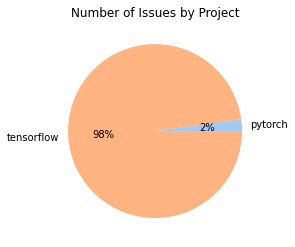

In [66]:
colors = sns.color_palette('pastel')[0:2]
plt.pie(issues_count_pd['Number_of_Issues'], labels = issues_count_pd['Projects'], colors = colors, autopct='%.0f%%')
plt.title("Number of Issues by Project")
plt.show()

In [14]:
# analyse average issue duration by project
# Create a temporary table 
df.createOrReplaceTempView('issues')

# Run a simple SQL command

issues_duration_tf = spark_mongo.sql("""
                                SELECT Projects,
                                    _id, 
                                    DATEDIFF(State.Closed_at, State.Created_at) as Duration
                                FROM issues
                                WHERE Projects = 'tensorflow' 
                                """)
issues_duration_tf_pd = issues_duration_tf.toPandas()
issues_duration_tf.show()

issues_duration_py = spark_mongo.sql("""
                                SELECT Projects,
                                    _id, 
                                    DATEDIFF(State.Closed_at, State.Created_at) as Duration
                                FROM issues 
                                WHERE Projects = 'pytorch'
                                """)
issues_duration_py_pd = issues_duration_py.toPandas()
issues_duration_py.show()

+----------+--------------------+--------+
|  Projects|                 _id|Duration|
+----------+--------------------+--------+
|tensorflow|[62d91d9edaae8e7a...|       8|
|tensorflow|[62d91d9edaae8e7a...|       1|
|tensorflow|[62d91d9edaae8e7a...|       0|
|tensorflow|[62d91d9edaae8e7a...|       6|
|tensorflow|[62d91d9edaae8e7a...|       0|
|tensorflow|[62d91d9edaae8e7a...|       0|
|tensorflow|[62d91d9edaae8e7a...|       1|
|tensorflow|[62d91d9edaae8e7a...|       3|
|tensorflow|[62d91d9edaae8e7a...|      29|
|tensorflow|[62d91d9edaae8e7a...|       2|
|tensorflow|[62d91d9edaae8e7a...|       0|
|tensorflow|[62d91d9edaae8e7a...|      14|
|tensorflow|[62d91d9edaae8e7a...|      14|
|tensorflow|[62d91d9edaae8e7a...|      17|
|tensorflow|[62d91d9edaae8e7a...|       4|
|tensorflow|[62d91d9edaae8e7a...|       1|
|tensorflow|[62d91d9edaae8e7a...|      14|
|tensorflow|[62d91d9edaae8e7a...|      19|
|tensorflow|[62d91d9edaae8e7a...|     141|
|tensorflow|[62d91d9edaae8e7a...|       6|
+----------

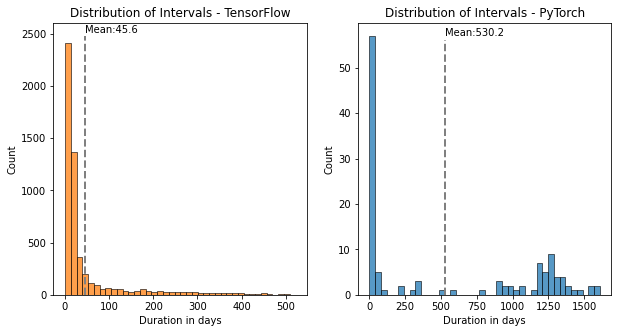

In [53]:
# distribution of interval
tf_mean = np.mean(issues_duration_tf_pd['Duration'])
py_mean = np.mean(issues_duration_py_pd['Duration'])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax = ax[0], data=issues_duration_tf_pd, x="Duration", color = sns.color_palette()[1], bins=40)
ax[0].set(xlabel='Duration in days', ylabel='Count')
ax[0].title.set_text("Distribution of Intervals - TensorFlow")
ax[0].vlines(x = tf_mean, ymin = 0, ymax = 2480, color = 'grey', linewidth=2, ls = '--')
ax[0].annotate(text = f'Mean:{tf_mean:0.1f}', xy=(tf_mean, 2510))
sns.histplot(ax = ax[1], data=issues_duration_py_pd, x="Duration", color = sns.color_palette()[0], bins=40)
ax[1].set(xlabel='Duration in days', ylabel='Count')
ax[1].title.set_text("Distribution of Intervals - PyTorch")
ax[1].vlines(x = py_mean, ymin = 0, ymax = 56, color = 'grey', linewidth=2, ls = '--')
ax[1].annotate(text = f'Mean:{py_mean:0.1f}', xy=(py_mean, 57))
plt.show()


In [49]:
print("""
    PyTorch Mean: {}
    PyTorch Median: {}
    TensorFlow Mean: {}
    TensorFlow Median: {}
    ------------
    """.format(round(np.mean(issues_duration_py_pd['Duration'])), 
                np.median(issues_duration_py_pd['Duration']), 
                round(np.mean(issues_duration_tf_pd['Duration'])), 
                np.median(issues_duration_tf_pd['Duration'])))
            


    PyTorch Mean: 530
    PyTorch Median: 61.5
    TensorFlow Mean: 46
    TensorFlow Median: 15.0
    ------------
    


In [51]:
issues_duration_py_pd['Duration'].describe()

count     120.000000
mean      530.216667
std       601.514911
min         0.000000
25%         0.000000
50%        61.500000
75%      1202.250000
max      1609.000000
Name: Duration, dtype: float64

In [52]:
issues_duration_tf_pd['Duration'].describe()

count    5393.000000
mean       45.575375
std        84.175777
min         0.000000
25%         3.000000
50%        15.000000
75%        35.000000
max       522.000000
Name: Duration, dtype: float64

In [73]:
# analyse # of issues created by month by project
# Create a temporary table 
df.createOrReplaceTempView('issues')

# Run a simple SQL command

issues_created_month = spark_mongo.sql("""
                                SELECT Projects,
                                    COUNT(DISTINCT _id) as Total_Issue, 
                                    MONTH(State.Created_at) as Created_Month,
                                    YEAR(State.Created_at) as Created_Year,
                                    CONCAT(YEAR(State.Created_at), '-', MONTH(State.Created_at)) as Created_YearMonth
                                FROM issues
                                GROUP BY Projects, Created_Month, Created_Year, Created_YearMonth
                                ORDER BY Created_Year ASC, Created_Month ASC
                                """)
issues_created_month_pd = issues_created_month.toPandas()
issues_created_month.show()

+--------+-----------+-------------+------------+-----------------+
|Projects|Total_Issue|Created_Month|Created_Year|Created_YearMonth|
+--------+-----------+-------------+------------+-----------------+
| pytorch|          2|            8|        2016|           2016-8|
| pytorch|          1|            9|        2016|           2016-9|
| pytorch|          1|           10|        2016|          2016-10|
| pytorch|          1|           11|        2016|          2016-11|
| pytorch|          2|            1|        2017|           2017-1|
| pytorch|          6|            2|        2017|           2017-2|
| pytorch|          3|            3|        2017|           2017-3|
| pytorch|          3|            4|        2017|           2017-4|
| pytorch|          5|            5|        2017|           2017-5|
| pytorch|          3|            6|        2017|           2017-6|
| pytorch|          7|            7|        2017|           2017-7|
| pytorch|          6|            8|        2017

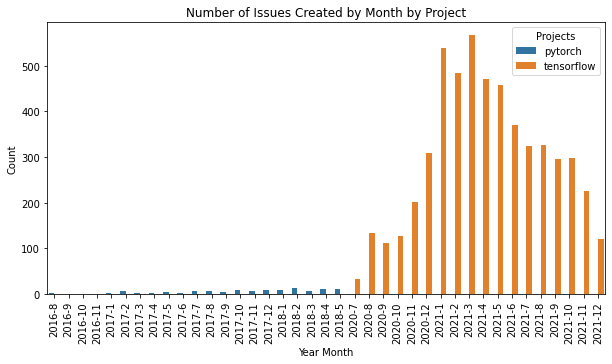

In [74]:
# created_by
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x="Created_YearMonth", y="Total_Issue", hue='Projects', data=issues_created_month_pd, ci=None)
ax.set(xlabel='Year Month', ylabel='Count')
plt.title("Number of Issues Created by Month by Project")
plt.xticks(rotation=90)
plt.show()



In [71]:
# analyse # of issues closed by month by project
# Create a temporary table 
df.createOrReplaceTempView('issues')

# Run a simple SQL command

issues_closed_month = spark_mongo.sql("""
                                SELECT Projects,
                                    COUNT(DISTINCT _id) as Total_Issue, 
                                    MONTH(State.Closed_at) as Closed_Month,
                                    YEAR(State.Closed_at) as Closed_Year,
                                    CONCAT(YEAR(State.Closed_at), '-', MONTH(State.Closed_at)) as Closed_YearMonth
                                FROM issues
                                GROUP BY Projects, Closed_Month, Closed_Year, Closed_YearMonth
                                ORDER BY Closed_Year ASC, Closed_Month ASC
                                """)
issues_closed_month_pd = issues_closed_month.toPandas()
issues_closed_month.show()

+--------+-----------+------------+-----------+----------------+
|Projects|Total_Issue|Closed_Month|Closed_Year|Closed_YearMonth|
+--------+-----------+------------+-----------+----------------+
| pytorch|          2|           9|       2016|          2016-9|
| pytorch|          1|          12|       2016|         2016-12|
| pytorch|          2|           1|       2017|          2017-1|
| pytorch|          3|           2|       2017|          2017-2|
| pytorch|          3|           3|       2017|          2017-3|
| pytorch|          2|           4|       2017|          2017-4|
| pytorch|          2|           5|       2017|          2017-5|
| pytorch|          3|           6|       2017|          2017-6|
| pytorch|          2|           7|       2017|          2017-7|
| pytorch|          3|           8|       2017|          2017-8|
| pytorch|          3|           9|       2017|          2017-9|
| pytorch|          4|          10|       2017|         2017-10|
| pytorch|          7|   

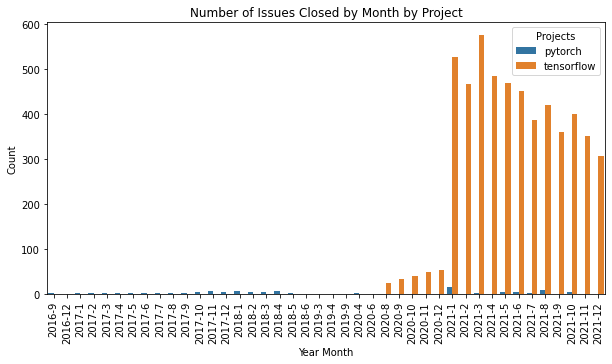

In [72]:
# closed_by
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x="Closed_YearMonth", y="Total_Issue", hue='Projects', data=issues_closed_month_pd, ci=None)
ax.set(xlabel='Year Month', ylabel='Count')
plt.title("Number of Issues Closed by Month by Project")
plt.xticks(rotation=90)
plt.show()


In [7]:
# top contributor to creating issues in TensorFlow
# Create a temporary table 
df.createOrReplaceTempView('issues')

# Run a simple SQL command

issues_user_tf = spark_mongo.sql("""
                                SELECT Projects,
                                    User.User_ID as User_ID,
                                    User.Username as User_Name,
                                    COUNT(DISTINCT _id) as Total_Issue,
                                    COUNT(DISTINCT _id)*100.0/ sum(COUNT(DISTINCT _id)) over () as Issue_Percent
                                FROM issues
                                WHERE Projects = 'tensorflow'
                                GROUP BY Projects, User_ID, User_Name
                                ORDER BY Total_Issue DESC
                                LIMIT (5)
                                """)
issues_user_tf.show()

22/07/22 01:20:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+--------------------+------------+-----------+----------------+
|  Projects|             User_ID|   User_Name|Total_Issue|   Issue_Percent|
+----------+--------------------+------------+-----------+----------------+
|tensorflow|MDQ6VXNlcjI3ODk5NTg=|  advaitjain|        100|1.85425551641016|
|tensorflow|MDQ6VXNlcjg4NTEzODk3|      pranve|         57|1.05692564435379|
|tensorflow|MDQ6VXNlcjUzMzEzMzU3|geetachavan1|         50|0.92712775820508|
|tensorflow|MDQ6VXNlcjM2ODU4MzMy|   deven-amd|         50|0.92712775820508|
|tensorflow|MDQ6VXNlcjEzMTY5MTEy| ddavis-2015|         47|0.87150009271278|
+----------+--------------------+------------+-----------+----------------+



In [11]:
# top contributor to creating issues in pytorch
# Create a temporary table 
df.createOrReplaceTempView('issues')

# Run a simple SQL command

issues_user_py = spark_mongo.sql("""
                                SELECT Projects,
                                    User.User_ID as User_ID,
                                    User.Username as User_Name,
                                    COUNT(DISTINCT _id) as Total_Issue,
                                    COUNT(DISTINCT _id)*100.0/ sum(COUNT(DISTINCT _id)) over () as Issue_Percent
                                FROM issues
                                WHERE Projects = 'pytorch'
                                GROUP BY Projects, User_ID, User_Name
                                ORDER BY Total_Issue DESC
                                LIMIT (5)
                                """)
issues_user_py.show()

22/07/22 10:12:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+--------+--------------------+--------------+-----------+----------------+
|Projects|             User_ID|     User_Name|Total_Issue|   Issue_Percent|
+--------+--------------------+--------------+-----------+----------------+
| pytorch|    MDQ6VXNlcjEzNTY0|        ezyang|          4|3.33333333333333|
| pytorch|MDQ6VXNlcjU2NzQ1OTc=|          SsnL|          3|2.50000000000000|
| pytorch|MDQ6VXNlcjMxNzg0MzE=|loudinthecloud|          2|1.66666666666667|
| pytorch|MDQ6VXNlcjg4ODU1NTY=|       glample|          2|1.66666666666667|
| pytorch|MDQ6VXNlcjEzMTA1NzA=|       soumith|          2|1.66666666666667|
+--------+--------------------+--------------+-----------+----------------+



In [12]:
# top contributor to closing issues in TensorFlow
# Create a temporary table 
df.createOrReplaceTempView('issues')

# Run a simple SQL command

issues_close_tf = spark_mongo.sql("""
                                SELECT Projects,
                                    Closed_by,
                                    COUNT(DISTINCT _id) as Total_Issue,
                                    COUNT(DISTINCT _id)*100.0/ sum(COUNT(DISTINCT _id)) over () as Issue_Percent
                                FROM issues
                                WHERE Projects = 'tensorflow'
                                GROUP BY Projects, Closed_by
                                ORDER BY Total_Issue DESC
                                LIMIT (5)
                                """)
issues_close_tf.show()

22/07/22 10:12:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+--------------------+-----------+-----------------+
|  Projects|           Closed_by|Total_Issue|    Issue_Percent|
+----------+--------------------+-----------+-----------------+
|tensorflow|                null|       3303|61.24605970702763|
|tensorflow|      Mihai Maruseac|        296| 5.48859632857408|
|tensorflow|         Yasir Modak|        136| 2.52178750231782|
|tensorflow|      Jae sung Chung|         62| 1.14963842017430|
|tensorflow|Vishnuvardhan Jan...|         57| 1.05692564435379|
+----------+--------------------+-----------+-----------------+



In [13]:
# top contributor to closing issues in pytorch
# Create a temporary table 
df.createOrReplaceTempView('issues')

# Run a simple SQL command

issues_close_py = spark_mongo.sql("""
                                SELECT Projects,
                                    Closed_by,
                                    COUNT(DISTINCT _id) as Total_Issue,
                                    COUNT(DISTINCT _id)*100.0/ sum(COUNT(DISTINCT _id)) over () as Issue_Percent
                                FROM issues
                                WHERE Projects = 'pytorch'
                                GROUP BY Projects, Closed_by
                                ORDER BY Total_Issue DESC
                                LIMIT (5)
                                """)
issues_close_py.show()

22/07/22 10:13:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+--------+----------------+-----------+-----------------+
|Projects|       Closed_by|Total_Issue|    Issue_Percent|
+--------+----------------+-----------+-----------------+
| pytorch|     Adam Paszke|         25|20.83333333333333|
| pytorch|Soumith Chintala|         22|18.33333333333333|
| pytorch|    Mike Ruberry|         19|15.83333333333333|
| pytorch|     Gary Miguel|          8| 6.66666666666667|
| pytorch|            null|          8| 6.66666666666667|
+--------+----------------+-----------+-----------------+



### Connect to IssueComment

In [2]:
import findspark
findspark.init()
findspark.add_packages(r"org.mongodb.spark:mongo-spark-connector_2.12:3.0.1")

In [3]:
# Session with Mongo
from pyspark.sql import SparkSession
spark_mongo = SparkSession \
    .builder \
    .appName("IssueComment") \
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1:27017/github.IssueComment") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1:27017/github.IssueComment") \
    .config('spark.jars.packages', 'org.mongodb.spark:mongo-spark-connector_2.12:3.0.1') \
    .getOrCreate()

Ivy Default Cache set to: /Users/crystal_wong/.ivy2/cache
The jars for the packages stored in: /Users/crystal_wong/.ivy2/jars
:: loading settings :: url = jar:file:/Users/crystal_wong/opt/anaconda3/envs/DMS/lib/python3.8/site-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml
org.mongodb.spark#mongo-spark-connector_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-8fe235ac-62a5-4f3a-9722-36c15f82a96f;1.0
	confs: [default]
	found org.mongodb.spark#mongo-spark-connector_2.12;3.0.1 in central
	found org.mongodb#mongodb-driver-sync;4.0.5 in central
	found org.mongodb#bson;4.0.5 in central
	found org.mongodb#mongodb-driver-core;4.0.5 in central
:: resolution report :: resolve 263ms :: artifacts dl 6ms
	:: modules in use:
	org.mongodb#bson;4.0.5 from central in [default]
	org.mongodb#mongodb-driver-core;4.0.5 from central in [default]
	org.mongodb#mongodb-driver-sync;4.0.5 from central in [default]
	org.mongodb.spark#m

In [4]:
# load data from MongoDB
df = spark_mongo.read.format("mongo").load()

df.printSchema()

root
 |-- Comment_created_at: timestamp (nullable = true)
 |-- Comment_id: string (nullable = true)
 |-- Comment_text: string (nullable = true)
 |-- Comment_updated_at: timestamp (nullable = true)
 |-- Comment_user: string (nullable = true)
 |-- Comment_user_id: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)



In [5]:
# trends of new comments by month by project
# Create a temporary table 
df.createOrReplaceTempView('issuecomment')

# Run a simple SQL command
conmment_trend = spark_mongo.sql("""
                            SELECT COUNT(DISTINCT _id) as Total_Comments, 
                                MONTH(Comment_created_at) as Month, 
                                YEAR(Comment_created_at) as Year, 
                                CONCAT(YEAR(Comment_created_at), '-', MONTH(Comment_created_at)) as Year_Month
                            FROM issuecomment 
                            GROUP BY Month, Year, Year_Month
                            ORDER BY Year ASC, Month ASC, Year_Month ASC"""
                        )
conmment_trend_pd = conmment_trend.toPandas()
conmment_trend.show()

+--------------+-----+----+----------+
|Total_Comments|Month|Year|Year_Month|
+--------------+-----+----+----------+
|            14|    9|2016|    2016-9|
|            10|   10|2016|   2016-10|
|            10|   11|2016|   2016-11|
|             2|   12|2016|   2016-12|
|            16|    1|2017|    2017-1|
|            46|    2|2017|    2017-2|
|            20|    3|2017|    2017-3|
|            20|    4|2017|    2017-4|
|            46|    5|2017|    2017-5|
|            26|    6|2017|    2017-6|
|            36|    7|2017|    2017-7|
|           104|    8|2017|    2017-8|
|            28|    9|2017|    2017-9|
|            64|   10|2017|   2017-10|
|            90|   11|2017|   2017-11|
|            70|   12|2017|   2017-12|
|           160|    1|2018|    2018-1|
|            98|    2|2018|    2018-2|
|           132|    3|2018|    2018-3|
|           102|    4|2018|    2018-4|
+--------------+-----+----+----------+
only showing top 20 rows



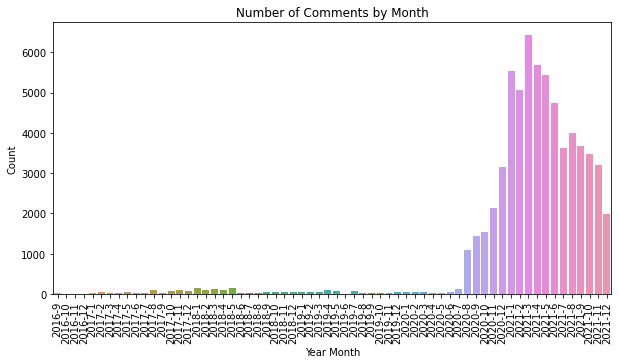

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x="Year_Month", y="Total_Comments", data=conmment_trend_pd)
ax.set(xlabel='Year Month', ylabel='Count')
plt.title("Number of Comments by Month")
plt.xticks(rotation=90)
plt.show()

In [8]:
# top user commenting
# trends of new comments by month by project
# Create a temporary table 
df.createOrReplaceTempView('issuecomment')

# Run a simple SQL command
conmment_user = spark_mongo.sql("""
                            SELECT
                                Comment_user,
                                Comment_user_id,
                                COUNT(DISTINCT _id) as Total_Comments,
                                COUNT(DISTINCT _id)*100.0/ sum(COUNT(DISTINCT _id)) over () as Comment_Percent
                            FROM issuecomment 
                            GROUP BY Comment_user, Comment_user_id
                            ORDER BY Total_Comments DESC
                            LIMIT(5)
                            """
                        )
conmment_user.show()

22/07/22 01:17:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+--------------------+--------------------+--------------+-----------------+
|        Comment_user|     Comment_user_id|Total_Comments|  Comment_Percent|
+--------------------+--------------------+--------------+-----------------+
|google-ml-butler[...|MDM6Qm90NTY2MTAwMTQ=|         12554|19.41600420674936|
|           Saduf2019|MDQ6VXNlcjU5ODIyOTI2|          2136| 3.30353552537969|
|              gbaned|MDQ6VXNlcjQ4MjE1NzE3|          1838| 2.84264901481642|
|               bhack|MDQ6VXNlcjE3MTA1Mjg=|          1500| 2.31989854310371|
|        amahendrakar|MDQ6VXNlcjU3MTY1MTQy|          1452| 2.24566178972440|
+--------------------+--------------------+--------------+-----------------+



In [13]:
# keywords
# trends of new comments by month by project
# Create a temporary table 
df.createOrReplaceTempView('issuecomment')

# Run a simple SQL command
conmment_text = spark_mongo.sql("""
                            SELECT Comment_text as Comment,
                                MONTH(Comment_created_at) as Month, 
                                YEAR(Comment_created_at) as Year, 
                                CONCAT(YEAR(Comment_created_at), '-', MONTH(Comment_created_at)) as Year_Month
                            FROM issuecomment 
                            """
                        )
conmment_text_pd = conmment_text.toPandas()
conmment_text.show()

+--------------------+-----+----+----------+
|             Comment|Month|Year|Year_Month|
+--------------------+-----+----+----------+
|@alykhantejani (a...|    8|2017|    2017-8|
|@hinthornw This s...|    8|2017|    2017-8|
|@alykhantejani Wh...|    4|2019|    2019-4|
|         cc @fmassa |    4|2019|    2019-4|
|I'd be tempted to...|    4|2019|    2019-4|
|           Any news?|    4|2020|    2020-4|
|The status is tha...|    5|2020|    2020-5|
|The implementatio...|    9|2020|    2020-9|
|This has been add...|    1|2021|    2021-1|
|Are there plans t...|    1|2021|    2021-1|
|No current plans,...|    1|2021|    2021-1|
|@franchenstein - ...|   11|2020|   2020-11|
|Closing since the...|    8|2021|    2021-8|
|you are running t...|   11|2017|   2017-11|
|Thank you, @soumi...|   11|2017|   2017-11|
|i'm trying to run...|    1|2018|    2018-1|
|Try setting `CUDA...|    1|2018|    2018-1|
|Thanks. Is there ...|    1|2018|    2018-1|
|Can you post a fu...|    1|2018|    2018-1|
|Can you k

In [14]:
# quick cleaning of words to see
conmment_text_pd

,Comment,Month,Year,Year_Month
0,@alykhantejani (as the man behind PixelShuffle...,8,2017,2017-8
1,@hinthornw This sounds like something for a py...,8,2017,2017-8
2,@alykhantejani Why should unshuffle qualify fo...,4,2019,2019-4
3,cc @fmassa,4,2019,2019-4
4,I'd be tempted to add this layer in `torchvisi...,4,2019,2019-4
...,...,...,...,...
64653,A little bit more experiments. I\\ve tried rep...,8,2020,2020-8
64654,"And another update, I've also tried the VGG16 ...",8,2020,2020-8
64655,I have tried to limit the GPU memory to 4096 a...,12,2021,2021-12
64656,This issue has been automatically marked as st...,12,2021,2021-12


In [27]:
import spacy

In [58]:
# remove user name, remove stopwords, lemmatise

nlp = spacy.load("en_core_web_lg")
docs = nlp.pipe(
    conmment_text_pd.loc[:, 'Comment'].str.lower(),
    batch_size=500, 
    disable=["tok2vec"]
)

tkns_docs = []
for doc in docs:
    tmp = []
    for token in doc:
        if (
            token.is_stop == False
            and token.is_punct == False
            and token.like_num == False
            and token.is_space == False
            and token.is_oov == False
        ):
            tmp.append(token.lemma_)
    tkns_docs.append(tmp)
    del tmp


In [59]:
tkns_docs

[['man', 'add'],
 ['sounds',
  'like',
  'contrib',
  'repo',
  'currently',
  'works',
  'established',
  'ping',
  'set'],
 ['qualify',
  'contrib',
  'shuffle',
  'main',
  'repo',
  'weird',
  'implement',
  'logic',
  'counterpart',
  'lots',
  'recent',
  'work',
  'relies',
  'beneficial',
  'people',
  'waste',
  'time',
  'looking'],
 ['cc'],
 ['tempted',
  'add',
  'layer',
  '`',
  '`',
  'given',
  '`',
  '`',
  'think',
  'add',
  'core',
  'pretty',
  'specific',
  'vision',
  'implemented',
  'efficiently',
  'lines',
  'python',
  'code'],
 ['news'],
 ['status',
  'happy',
  'accept',
  'pr',
  'adding',
  'feature',
  'core',
  'dev',
  'working',
  'moment'],
 ['implementation',
  'topic',
  'starter',
  'efficient',
  'seen',
  'usually',
  'beginning',
  'network',
  'benefits',
  'adding',
  'core',
  'questionable',
  'need',
  'class',
  'copy',
  'paste',
  '`',
  '`',
  '`',
  'python',
  'class',
  'def',
  'assert',
  'supports',
  'blocks',
  'size',
  '=',
